# WORKING DOC

### Import Libraries and Dependencies

In [1]:
# Import libraries and dependencies
import os
import ccxt
import warnings
# import pyEX as p
import numpy as np
import pandas as pd
from pathlib import Path
from datetime import datetime
from dotenv import load_dotenv
import matplotlib.pyplot as plt


warnings.filterwarnings('ignore')
%matplotlib inline

### Import Environment Variables

In [2]:
# Load environment variables
load_dotenv()

# Import environment variables
kraken_public_key = os.getenv("KRAKEN_PUBLIC_KEY")
kraken_secret_key = os.getenv("KRAKEN_SECRET_KEY")

# Verify that environment variables were loaded
print(f"Kraken key data type: {type(kraken_public_key)}")
print(f"Kraken secren data type: {type(kraken_secret_key)}")

Kraken key data type: <class 'NoneType'>
Kraken secren data type: <class 'NoneType'>


### Set Public and Private Keys for Kraken Exchange via the CCXT library

In [3]:
# Set the public and private keys for the API
exchange = ccxt.kraken({
    'apiKey': kraken_public_key,
    'secret': kraken_secret_key,
})

### Connect to Kraken and Load Available Cyptocurrency Data

In [4]:
# Connect to Kraken and load the available cryptocurrencies
crypto_details = exchange.load_markets()
crypto_details['BTC/USD']['symbol']

'BTC/USD'

In [5]:
# Import data as a Pandas DataFrame
crypto_df = pd.DataFrame(crypto_details)

# Display sample data
crypto_df

,AAVE/AUD,AAVE/ETH,AAVE/EUR,AAVE/GBP,AAVE/USD,AAVE/BTC,ADA/AUD,ADA/ETH,ADA/EUR,ADA/GBP,...,YFI/USD,YFI/BTC,EUR/USD,GBP/USD,ZRX/EUR,ZRX/GBP,ZRX/USD,ZRX/BTC,USD/CAD,USD/JPY
percentage,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
tierBased,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
taker,0.0026,0.0026,0.0026,0.0026,0.0026,0.0026,0.0026,0.0026,0.0026,0.0026,...,0.0026,0.0026,0.002,0.002,0.0026,0.0026,0.0026,0.0026,0.002,0.0
maker,0.0016,0.0016,0.0016,0.0016,0.0016,0.0016,0.0016,0.0016,0.0016,0.0016,...,0.0016,0.0016,0.002,0.002,0.0016,0.0016,0.0016,0.0016,0.002,0.0
tiers,"{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...",...,"{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000..."
precision,"{'amount': 8, 'price': 2}","{'amount': 8, 'price': 4}","{'amount': 8, 'price': 2}","{'amount': 8, 'price': 2}","{'amount': 8, 'price': 2}","{'amount': 8, 'price': 6}","{'amount': 8, 'price': 5}","{'amount': 8, 'price': 7}","{'amount': 8, 'price': 6}","{'amount': 8, 'price': 5}",...,"{'amount': 8, 'price': 0}","{'amount': 8, 'price': 4}","{'amount': 8, 'price': 5}","{'amount': 8, 'price': 5}","{'amount': 8, 'price': 3}","{'amount': 8, 'price': 3}","{'amount': 8, 'price': 3}","{'amount': 8, 'price': 8}","{'amount': 8, 'price': 5}","{'amount': 8, 'price': 3}"
limits,"{'amount': {'min': 0.02, 'max': 100000000.0}, ...","{'amount': {'min': 0.02, 'max': 100000000.0}, ...","{'amount': {'min': 0.02, 'max': 100000000.0}, ...","{'amount': {'min': 0.02, 'max': 100000000.0}, ...","{'amount': {'min': 0.02, 'max': 100000000.0}, ...","{'amount': {'min': 0.02, 'max': 100000000.0}, ...","{'amount': {'min': 5.0, 'max': 100000000.0}, '...","{'amount': {'min': 5.0, 'max': 100000000.0}, '...","{'amount': {'min': 5.0, 'max': 100000000.0}, '...","{'amount': {'min': 5.0, 'max': 100000000.0}, '...",...,"{'amount': {'min': 0.00015, 'max': 100000000.0...","{'amount': {'min': 0.00015, 'max': 100000000.0...","{'amount': {'min': 5.0, 'max': 100000000.0}, '...","{'amount': {'min': 5.0, 'max': 100000000.0}, '...","{'amount': {'min': 5.0, 'max': 100000000.0}, '...","{'amount': {'min': 5.0, 'max': 100000000.0}, '...","{'amount': {'min': 5.0, 'max': 100000000.0}, '...","{'amount': {'min': 5.0, 'max': 100000000.0}, '...","{'amount': {'min': 10.0, 'max': 100000000.0}, ...","{'amount': {'min': 10.0, 'max': 100000000.0}, ..."
id,AAVEAUD,AAVEETH,AAVEEUR,AAVEGBP,AAVEUSD,AAVEXBT,ADAAUD,ADAETH,ADAEUR,ADAGBP,...,YFIUSD,YFIXBT,ZEURZUSD,ZGBPZUSD,ZRXEUR,ZRXGBP,ZRXUSD,ZRXXBT,ZUSDZCAD,ZUSDZJPY
symbol,AAVE/AUD,AAVE/ETH,AAVE/EUR,AAVE/GBP,AAVE/USD,AAVE/BTC,ADA/AUD,ADA/ETH,ADA/EUR,ADA/GBP,...,YFI/USD,YFI/BTC,EUR/USD,GBP/USD,ZRX/EUR,ZRX/GBP,ZRX/USD,ZRX/BTC,USD/CAD,USD/JPY
base,AAVE,AAVE,AAVE,AAVE,AAVE,AAVE,ADA,ADA,ADA,ADA,...,YFI,YFI,EUR,GBP,ZRX,ZRX,ZRX,ZRX,USD,USD


### List Available Cryptocurrencies for Trading

In [6]:
# Print column values of DataFrame
# print(type(crypto_df.columns.values))
# print(len(crypto_df.columns.values))
pairs = crypto_df.columns.values
pairs_df = pd.DataFrame(pairs, columns=['pairs'])
pairs_df.shape

(356, 1)

In [7]:
#Create numpy array identifying which pairs contain USDT pairs
usdt_bool_np = pairs_df.pairs.str.contains("/USDT")

# Add USDT numpy array boolean pairs to dataframe
pairs_df['USDT'] = usdt_bool_np

#remove pairs without USDT
pairs_df = pairs_df[pairs_df.USDT != False]

#reset the index, drop extraneous columns
pairs_df = pairs_df.reset_index()
pairs_df = pairs_df.drop(columns=['index', 'USDT'])

pairs_df

,pairs
0,ADA/USDT
1,BCH/USDT
2,DAI/USDT
3,DOT/USDT
4,EOS/USDT
5,ETH/USDT
6,LINK/USDT
7,LTC/USDT
8,USDC/USDT
9,BTC/USDT


### Fetch Historical Data for LINK/USDT

In [8]:
# Fetch daily candlestick bar data from `BTC/USD`
historical_prices = exchange.fetch_ohlcv("LINK/USDT", "1h")
historical_prices[2]

[1620136800000, 43.86089, 44.78445, 42.5, 43.45113, 13654.87869952]

In [9]:
# Import the data as a Pandas DataFrame and set the columns
historical_prices_df = pd.DataFrame(
    historical_prices, 
    columns=["timestamp", "open", "high", "low", "close", "volume"]
)

display(historical_prices_df.head())
display()
display("____________________________________")
display()
display(f"historical_prices_df shape: {historical_prices_df.shape}")

,timestamp,open,high,low,close,volume
0,1620129600000,42.77937,43.33146,41.65136,43.33146,6733.085728
1,1620133200000,43.33148,43.96450,42.80000,43.62079,3884.544996
2,1620136800000,43.86089,44.78445,42.50000,43.45113,13654.878700
3,1620140400000,43.63000,44.16618,41.71651,42.81913,6420.149362
4,1620144000000,42.52504,43.42227,41.51381,42.15578,6150.195445


'____________________________________'

'historical_prices_df shape: (720, 6)'

### Convert Epoch Timestamp to Readable Date Format

In [10]:
# Convert epoch timestamp to date using the `to_datetime` function and `unit` parameter
historical_prices_df["date"] = pd.to_datetime(
    historical_prices_df["timestamp"], 
    unit="ms"
)

# UNIT ARGUEMENTS COULD INCLUDE: (ms,us,ns) 

display(historical_prices_df.head())
display("_________________________")
display(f"historical_prices_df shape: {historical_prices_df.shape}")

,timestamp,open,high,low,close,volume,date
0,1620129600000,42.77937,43.33146,41.65136,43.33146,6733.085728,2021-05-04 12:00:00
1,1620133200000,43.33148,43.96450,42.80000,43.62079,3884.544996,2021-05-04 13:00:00
2,1620136800000,43.86089,44.78445,42.50000,43.45113,13654.878700,2021-05-04 14:00:00
3,1620140400000,43.63000,44.16618,41.71651,42.81913,6420.149362,2021-05-04 15:00:00
4,1620144000000,42.52504,43.42227,41.51381,42.15578,6150.195445,2021-05-04 16:00:00


'_________________________'

'historical_prices_df shape: (720, 7)'

In [11]:
# historical_prices_df = historical_prices_df.set_index('date')
historical_prices_df.set_index(pd.to_datetime(
    historical_prices_df['date'], 
    infer_datetime_format=True), 
    inplace=True
)
historical_prices_df

,timestamp,open,high,low,close,volume,date
date,,,,,,,
2021-05-04 12:00:00,1620129600000,42.77937,43.33146,41.65136,43.33146,6733.085728,2021-05-04 12:00:00
2021-05-04 13:00:00,1620133200000,43.33148,43.96450,42.80000,43.62079,3884.544996,2021-05-04 13:00:00
2021-05-04 14:00:00,1620136800000,43.86089,44.78445,42.50000,43.45113,13654.878700,2021-05-04 14:00:00
2021-05-04 15:00:00,1620140400000,43.63000,44.16618,41.71651,42.81913,6420.149362,2021-05-04 15:00:00
2021-05-04 16:00:00,1620144000000,42.52504,43.42227,41.51381,42.15578,6150.195445,2021-05-04 16:00:00
...,...,...,...,...,...,...,...
2021-06-03 07:00:00,1622703600000,31.70592,31.70592,31.46503,31.46503,80.208187,2021-06-03 07:00:00
2021-06-03 08:00:00,1622707200000,31.49886,31.93966,31.49886,31.76468,1175.047423,2021-06-03 08:00:00
2021-06-03 09:00:00,1622710800000,31.79756,32.32686,31.78489,32.25316,3093.806702,2021-06-03 09:00:00


### Plot Daily Returns

In [12]:
# Drop NAs and calculate daily percent return
historical_prices_df['daily_return'] = historical_prices_df['close'].pct_change()
historical_prices_df = historical_prices_df.dropna() 
historical_prices_df

,timestamp,open,high,low,close,volume,date,daily_return
date,,,,,,,,
2021-05-04 13:00:00,1620133200000,43.33148,43.96450,42.80000,43.62079,3884.544996,2021-05-04 13:00:00,0.006677
2021-05-04 14:00:00,1620136800000,43.86089,44.78445,42.50000,43.45113,13654.878700,2021-05-04 14:00:00,-0.003889
2021-05-04 15:00:00,1620140400000,43.63000,44.16618,41.71651,42.81913,6420.149362,2021-05-04 15:00:00,-0.014545
2021-05-04 16:00:00,1620144000000,42.52504,43.42227,41.51381,42.15578,6150.195445,2021-05-04 16:00:00,-0.015492
2021-05-04 17:00:00,1620147600000,42.37602,45.35715,42.37602,45.35000,2689.873831,2021-05-04 17:00:00,0.075772
...,...,...,...,...,...,...,...,...
2021-06-03 07:00:00,1622703600000,31.70592,31.70592,31.46503,31.46503,80.208187,2021-06-03 07:00:00,-0.016161
2021-06-03 08:00:00,1622707200000,31.49886,31.93966,31.49886,31.76468,1175.047423,2021-06-03 08:00:00,0.009523
2021-06-03 09:00:00,1622710800000,31.79756,32.32686,31.78489,32.25316,3093.806702,2021-06-03 09:00:00,0.015378


### Construct Exponential Moving Average of Closing Prices (Trading Signal, Feature One)
#### 9, 20, 50, 200

In [13]:
# Set short and long windows


# Construct EMAS for short and long windows, respectively 9, 20, 50 and 200
historical_prices_df['EMA_9'] = historical_prices_df['close'].ewm(halflife=9).mean()
historical_prices_df['EMA_20'] = historical_prices_df['close'].ewm(halflife=20).mean()
historical_prices_df['EMA_50'] = historical_prices_df['close'].ewm(halflife=50).mean()
historical_prices_df['EMA_200'] = historical_prices_df['close'].ewm(halflife=200).mean()

# Construct a 9 VS 20 crossover trading signal
historical_prices_df['crossover_long_9v20'] = np.where(historical_prices_df['EMA_9'] > historical_prices_df['EMA_20'], 1.0, 0.0)
historical_prices_df['crossover_short_9v20'] = np.where(historical_prices_df['EMA_9'] < historical_prices_df['EMA_20'], -1.0, 0.0)
historical_prices_df['crossover_signal_9v20'] = historical_prices_df['crossover_long_9v20'] + historical_prices_df['crossover_short_9v20']


# Construct a 50 VS 200 crossover trading signal
historical_prices_df['crossover_long_50v200'] = np.where(historical_prices_df['EMA_50'] > historical_prices_df['EMA_200'], 1.0, 0.0)
historical_prices_df['crossover_short_50v200'] = np.where(historical_prices_df['EMA_50'] < historical_prices_df['EMA_200'], -1.0, 0.0)
historical_prices_df['crossover_signal_50v200'] = historical_prices_df['crossover_long_50v200'] + historical_prices_df['crossover_short_50v200']


historical_prices_df.head()

,timestamp,open,high,low,close,volume,date,daily_return,EMA_9,EMA_20,EMA_50,EMA_200,crossover_long_9v20,crossover_short_9v20,crossover_signal_9v20,crossover_long_50v200,crossover_short_50v200,crossover_signal_50v200
date,,,,,,,,,,,,,,,,,,
2021-05-04 13:00:00,1620133200000,43.33148,43.96450,42.80000,43.62079,3884.544996,2021-05-04 13:00:00,0.006677,43.620790,43.620790,43.620790,43.620790,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-04 14:00:00,1620136800000,43.86089,44.78445,42.50000,43.45113,13654.878700,2021-05-04 14:00:00,-0.003889,43.532695,43.534490,43.535372,43.535813,0.0,-1.0,-1.0,0.0,-1.0,-1.0
2021-05-04 15:00:00,1620140400000,43.63000,44.16618,41.71651,42.81913,6420.149362,2021-05-04 15:00:00,-0.014545,43.276305,43.287727,43.293307,43.296090,0.0,-1.0,-1.0,0.0,-1.0,-1.0
2021-05-04 16:00:00,1620144000000,42.52504,43.42227,41.51381,42.15578,6150.195445,2021-05-04 16:00:00,-0.015492,42.963031,42.989863,43.002985,43.009529,0.0,-1.0,-1.0,0.0,-1.0,-1.0
2021-05-04 17:00:00,1620147600000,42.37602,45.35715,42.37602,45.35000,2689.873831,2021-05-04 17:00:00,0.075772,43.516635,43.495162,43.485492,43.480873,1.0,0.0,1.0,1.0,0.0,1.0


In [14]:
for col in historical_prices_df.columns:
    print(col)

timestamp
open
high
low
close
volume
date
daily_return
EMA_9
EMA_20
EMA_50
EMA_200
crossover_long_9v20
crossover_short_9v20
crossover_signal_9v20
crossover_long_50v200
crossover_short_50v200
crossover_signal_50v200


### Plot Exponential Moving Average of Closing Prices 9 VS 20

<AxesSubplot:xlabel='date'>

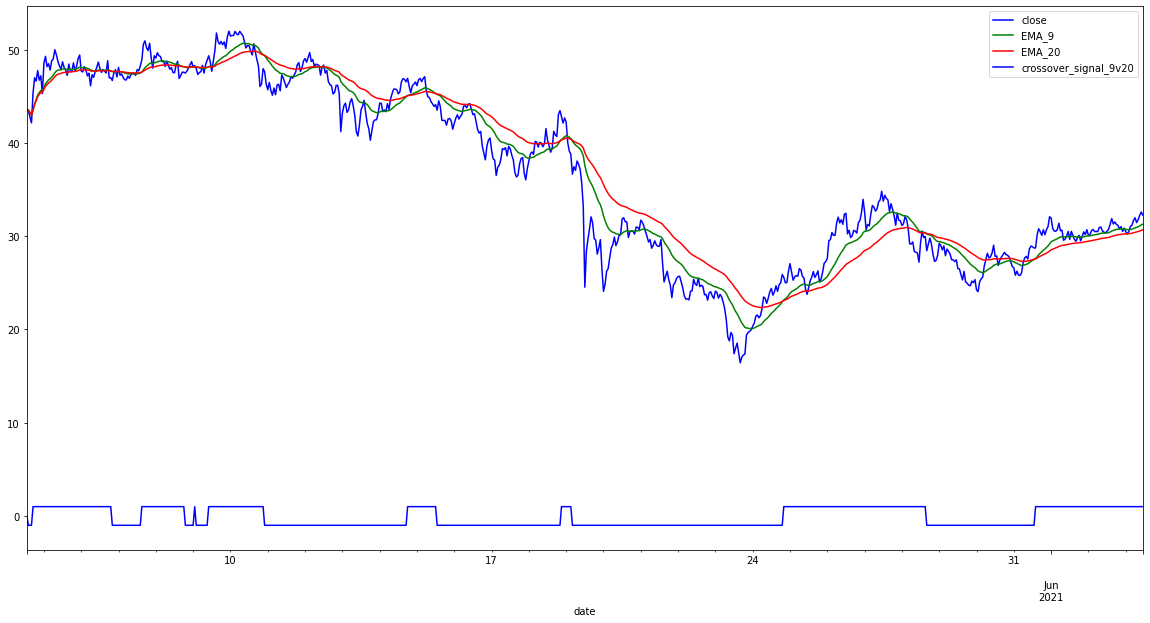

In [15]:
# Plot the EMA of BTC/USD closing prices
historical_prices_df[['close', 'EMA_9', 'EMA_20', 'crossover_signal_9v20']].plot(figsize=(20,10), color=['b', 'g', 'r', 'b'])

In [16]:
### Plot Exponential Moving Average of Closing Prices 50 VS 200

<AxesSubplot:xlabel='date'>

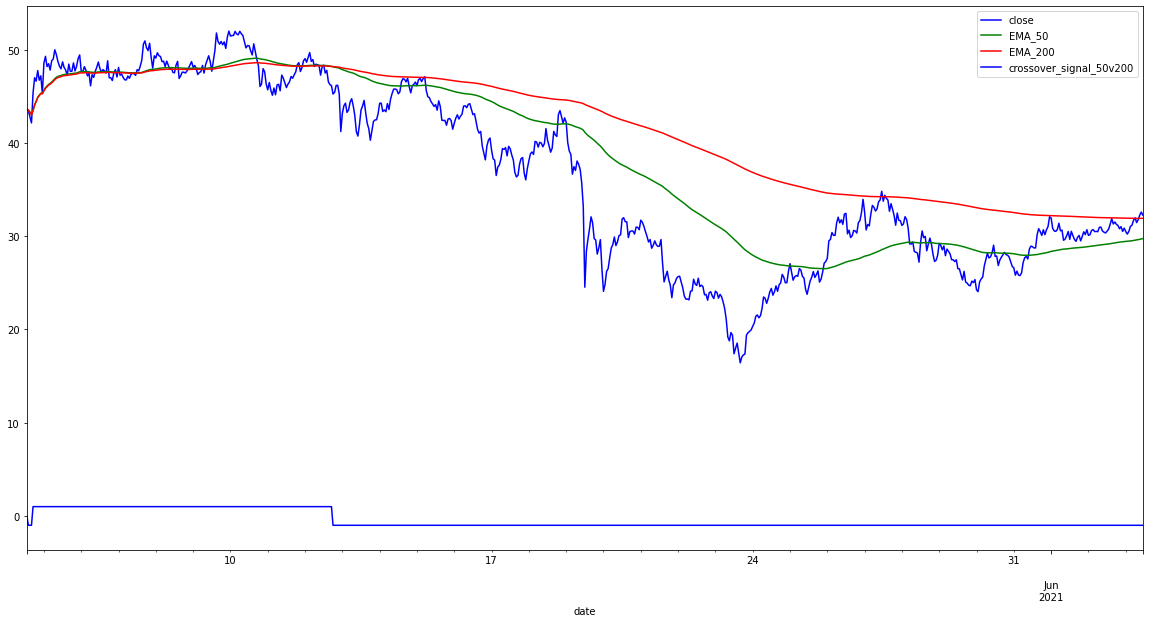

In [17]:
# Plot the EMA of BTC/USD closing prices
historical_prices_df[['close', 'EMA_50', 'EMA_200', 'crossover_signal_50v200']].plot(figsize=(20,10), color=['b', 'g', 'r', 'b'])

<AxesSubplot:xlabel='date'>

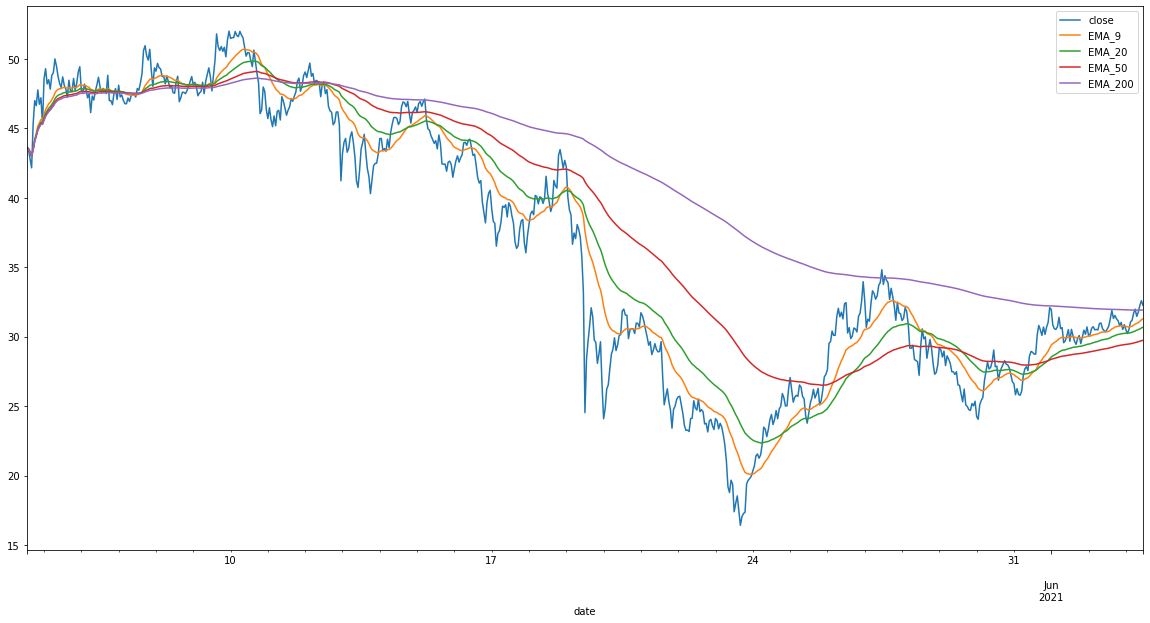

In [18]:
# Plot the EMA of BTC/USD closing prices
historical_prices_df[['close', 'EMA_9', 'EMA_20', 'EMA_50', 'EMA_200']].plot(figsize=(20,10))

### Construct Bollinger Band (Trading Signal, Feature Three)

In [19]:
# Set bollinger band window
bollinger_window = 20

# Calculate rolling mean and standard deviation
historical_prices_df['bollinger_mid_band'] = historical_prices_df['close'].rolling(window=bollinger_window).mean()
historical_prices_df['bollinger_std'] = historical_prices_df['close'].rolling(window=20).std()

# Calculate upper and lowers bands of bollinger band
historical_prices_df['bollinger_upper_band']  = historical_prices_df['bollinger_mid_band'] + (historical_prices_df['bollinger_std'] * 1)
historical_prices_df['bollinger_lower_band']  = historical_prices_df['bollinger_mid_band'] - (historical_prices_df['bollinger_std'] * 1)

# Calculate bollinger band trading signal
historical_prices_df['bollinger_long'] = np.where(historical_prices_df['close'] < historical_prices_df['bollinger_lower_band'], 1.0, 0.0)
historical_prices_df['bollinger_short'] = np.where(historical_prices_df['close'] > historical_prices_df['bollinger_upper_band'], -1.0, 0.0)
historical_prices_df['bollinger_signal'] = historical_prices_df['bollinger_long'] + historical_prices_df['bollinger_short']

historical_prices_df.iloc[50:60]

,timestamp,open,high,low,close,volume,date,daily_return,EMA_9,EMA_20,...,crossover_long_50v200,crossover_short_50v200,crossover_signal_50v200,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal
date,,,,,,,,,,,,,,,,,,,,,
2021-05-06 15:00:00,1620313200000,47.92538,48.23743,47.34057,47.71274,776.102246,2021-05-06 15:00:00,-0.003421,47.811447,47.749795,...,1.0,0.0,1.0,47.830613,0.712920,48.543533,47.117692,0.0,0.0,0.0
2021-05-06 16:00:00,1620316800000,47.82114,48.45431,47.45252,47.50393,5330.274695,2021-05-06 16:00:00,-0.004376,47.788229,47.739766,...,1.0,0.0,1.0,47.819440,0.716366,48.535805,47.103074,0.0,0.0,0.0
2021-05-06 17:00:00,1620320400000,47.50650,49.69403,47.46647,48.82000,4604.094081,2021-05-06 17:00:00,0.027704,47.866022,47.783536,...,1.0,0.0,1.0,47.849169,0.745832,48.595001,47.103337,0.0,-1.0,-1.0
2021-05-06 18:00:00,1620324000000,48.87497,49.44126,46.00000,46.99211,8451.901092,2021-05-06 18:00:00,-0.037441,47.800215,47.751674,...,1.0,0.0,1.0,47.746003,0.712138,48.458141,47.033865,1.0,0.0,1.0
2021-05-06 19:00:00,1620327600000,46.96836,47.30516,45.35715,47.00000,2925.315123,2021-05-06 19:00:00,0.000168,47.740028,47.721598,...,1.0,0.0,1.0,47.624099,0.608355,48.232454,47.015743,1.0,0.0,1.0
2021-05-06 20:00:00,1620331200000,46.99518,46.99518,46.23744,46.70000,333.621531,2021-05-06 20:00:00,-0.006383,47.661889,47.680964,...,1.0,0.0,1.0,47.573083,0.641728,48.214811,46.931355,1.0,0.0,1.0
2021-05-06 21:00:00,1620334800000,46.61883,47.55872,46.61883,47.52779,887.271654,2021-05-06 21:00:00,0.017726,47.651824,47.674906,...,1.0,0.0,1.0,47.568685,0.641721,48.210406,46.926964,0.0,0.0,0.0
2021-05-06 22:00:00,1620338400000,47.40498,47.86214,47.02796,47.86214,2357.685883,2021-05-06 22:00:00,0.007035,47.667595,47.682271,...,1.0,0.0,1.0,47.552563,0.629364,48.181927,46.923198,0.0,0.0,0.0
2021-05-06 23:00:00,1620342000000,47.87235,47.87520,47.07778,47.07778,7923.292468,2021-05-06 23:00:00,-0.016388,47.623405,47.658619,...,1.0,0.0,1.0,47.515525,0.634663,48.150188,46.880863,0.0,0.0,0.0


### Plot Bollinger Bands

<AxesSubplot:xlabel='date'>

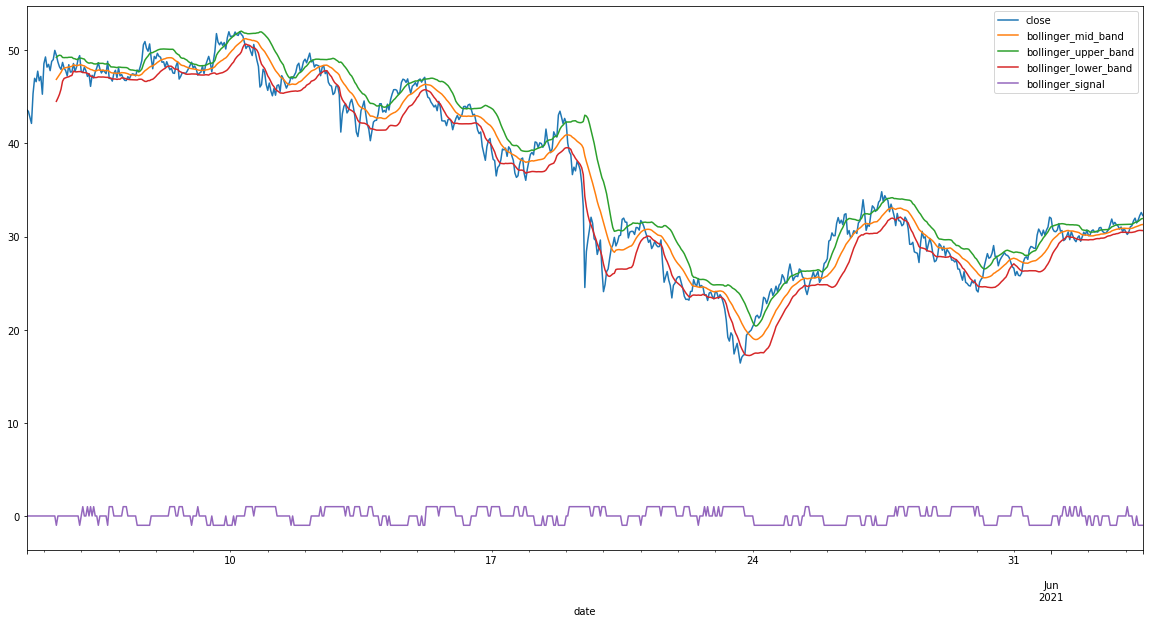

In [20]:
# Plot the Bollinger Bands for BTC/USD closing prices
historical_prices_df[['close','bollinger_mid_band','bollinger_upper_band','bollinger_lower_band', 'bollinger_signal']].plot(figsize=(20,10))

### Build MACD Signals

In [21]:

# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
historical_prices_df['mac_fast_12'] = historical_prices_df['close'].ewm(span=12, adjust=False).mean()
historical_prices_df['mac_slow_26'] = historical_prices_df['close'].ewm(span=26, adjust=False).mean()

# Build the Macd line and the Signal Line
macd = historical_prices_df['mac_fast_12'] - historical_prices_df['mac_slow_26']
historical_prices_df['macd'] = macd
historical_prices_df['mac_signal_line_9ema'] = macd.ewm(span=9, adjust=False).mean()

# Calculate difference between macd and signal
macd_diff = historical_prices_df['macd'] - historical_prices_df['mac_signal_line_9ema']
historical_prices_df['macd_diff'] = macd_diff


# Construct a macd trading signal
historical_prices_df['macd_long'] = np.where(historical_prices_df['macd_diff'] > 0, 1.0, 0.0)
historical_prices_df['macd_short'] = np.where(historical_prices_df['macd_diff'] < 0, -1.0, 0.0)
historical_prices_df['macd_signal'] = historical_prices_df['macd_long'] + historical_prices_df['macd_short']


historical_prices_df.iloc[50:55]

,timestamp,open,high,low,close,volume,date,daily_return,EMA_9,EMA_20,...,bollinger_short,bollinger_signal,mac_fast_12,mac_slow_26,macd,mac_signal_line_9ema,macd_diff,macd_long,macd_short,macd_signal
date,,,,,,,,,,,,,,,,,,,,,
2021-05-06 15:00:00,1620313200000,47.92538,48.23743,47.34057,47.71274,776.102246,2021-05-06 15:00:00,-0.003421,47.811447,47.749795,...,0.0,0.0,47.783382,47.728714,0.054668,0.074795,-0.020128,0.0,-1.0,-1.0
2021-05-06 16:00:00,1620316800000,47.82114,48.45431,47.45252,47.50393,5330.274695,2021-05-06 16:00:00,-0.004376,47.788229,47.739766,...,0.0,0.0,47.740389,47.712064,0.028326,0.065501,-0.037176,0.0,-1.0,-1.0
2021-05-06 17:00:00,1620320400000,47.50650,49.69403,47.46647,48.82000,4604.094081,2021-05-06 17:00:00,0.027704,47.866022,47.783536,...,-1.0,-1.0,47.906483,47.794133,0.112350,0.074871,0.037479,1.0,0.0,1.0
2021-05-06 18:00:00,1620324000000,48.87497,49.44126,46.00000,46.99211,8451.901092,2021-05-06 18:00:00,-0.037441,47.800215,47.751674,...,0.0,1.0,47.765810,47.734724,0.031087,0.066114,-0.035028,0.0,-1.0,-1.0
2021-05-06 19:00:00,1620327600000,46.96836,47.30516,45.35715,47.00000,2925.315123,2021-05-06 19:00:00,0.000168,47.740028,47.721598,...,0.0,1.0,47.647993,47.680300,-0.032306,0.046430,-0.078737,0.0,-1.0,-1.0


<AxesSubplot:xlabel='date'>

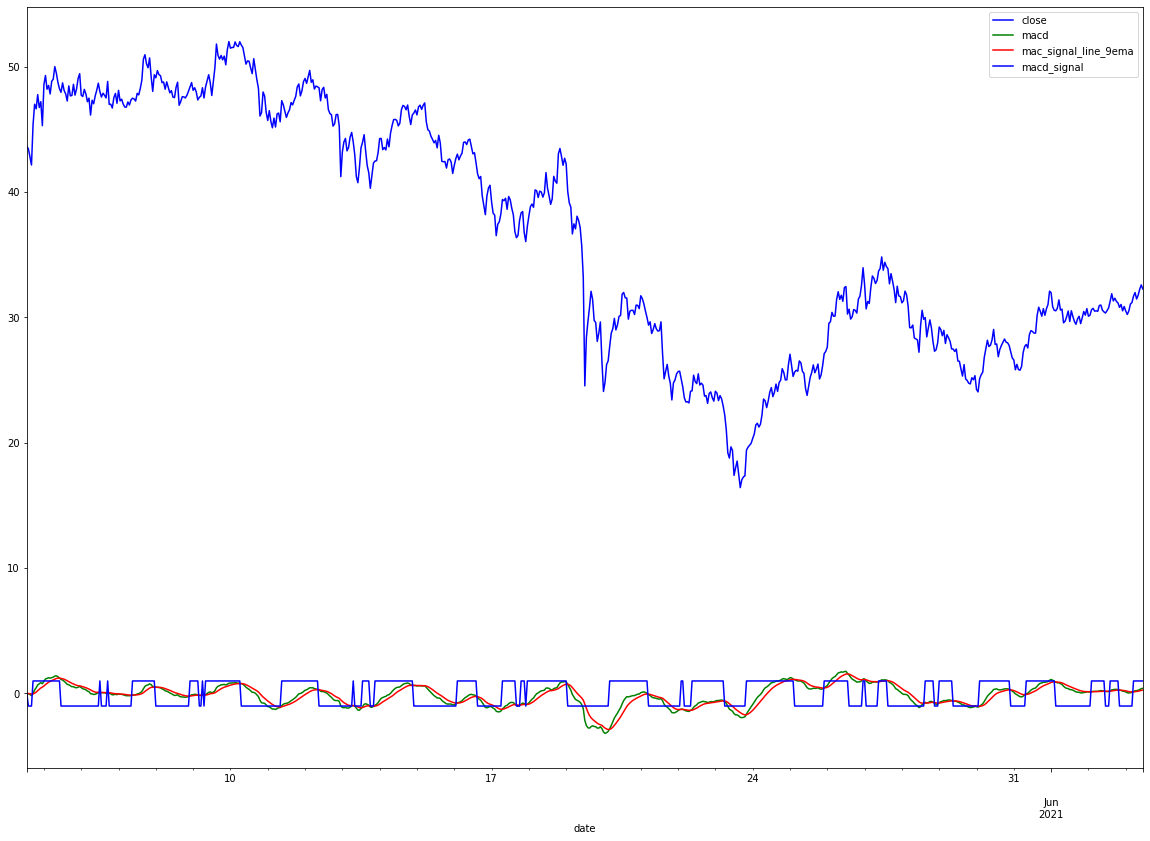

In [22]:
historical_prices_df[['close', 'macd','mac_signal_line_9ema', 'macd_signal']].plot(figsize=(20,14), color=['b', 'g', 'r', 'b'])

In [23]:
#### SAVE FOR LATER ####
### A conservative, yet effective way to use the macd is to exit your position the second the MACD-SIGNAL value starts to decrease.
###### i.e. if you're in a long position, and the mac

# historical_prices_df['macd_less_signal_slope'] = historical_prices_df.macd_less_signal.diff()
# historical_prices_df.head()

In [24]:
# historical_prices_df[['close','macd','macd_signal']].plot(figsize=(20,10))

# historical_prices_df[['macd_less_signal', 'macd_less_signal_slope', 'mac_signal']].plot(figsize=(20,10))
# plt.axhline(y=0, color='r', linestyle='-')


# SO, A CONSERVATIVE MACD SIGNAL WOULD SAY, CLOSE POSITION WHEN THE ORANGE LINE CROSSES BACK ABOVE THE ZERO LINE. 
# YOU EXIT YOUR POSITIONS EARLY AND OFTEN MISS BIG GAINS, HOWEVER, YOUR LIKELINESS TO TAKE HOME PROFIT IS HIGHER.

### Build RSI Signals

In [25]:
n = 14

def rma(x, n, y0):
    a = (n-1) / n
    ak = a**np.arange(len(x)-1, -1, -1)
    return np.r_[np.full(n, np.nan), y0, np.cumsum(ak * x) / ak / n + y0 * a**np.arange(1, len(x)+1)]

historical_prices_df['change'] = historical_prices_df['close'].diff()
historical_prices_df['gain'] = historical_prices_df.change.mask(historical_prices_df.change < 0, 0.0)
historical_prices_df['loss'] = -historical_prices_df.change.mask(historical_prices_df.change > 0, -0.0)
historical_prices_df['avg_gain'] = rma(historical_prices_df.gain[n+1:].to_numpy(), n, np.nansum(historical_prices_df.gain.to_numpy()[:n+1])/n)
historical_prices_df['avg_loss'] = rma(historical_prices_df.loss[n+1:].to_numpy(), n, np.nansum(historical_prices_df.loss.to_numpy()[:n+1])/n)
historical_prices_df['rs'] = historical_prices_df.avg_gain / historical_prices_df.avg_loss
historical_prices_df['rsi_14'] = 100 - (100 / (1 + historical_prices_df.rs))

historical_prices_df.head()


,timestamp,open,high,low,close,volume,date,daily_return,EMA_9,EMA_20,...,macd_long,macd_short,macd_signal,change,gain,loss,avg_gain,avg_loss,rs,rsi_14
date,,,,,,,,,,,,,,,,,,,,,
2021-05-04 13:00:00,1620133200000,43.33148,43.96450,42.80000,43.62079,3884.544996,2021-05-04 13:00:00,0.006677,43.620790,43.620790,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-04 14:00:00,1620136800000,43.86089,44.78445,42.50000,43.45113,13654.878700,2021-05-04 14:00:00,-0.003889,43.532695,43.534490,...,0.0,-1.0,-1.0,-0.16966,0.00000,0.16966,NaN,NaN,NaN,NaN
2021-05-04 15:00:00,1620140400000,43.63000,44.16618,41.71651,42.81913,6420.149362,2021-05-04 15:00:00,-0.014545,43.276305,43.287727,...,0.0,-1.0,-1.0,-0.63200,0.00000,0.63200,NaN,NaN,NaN,NaN
2021-05-04 16:00:00,1620144000000,42.52504,43.42227,41.51381,42.15578,6150.195445,2021-05-04 16:00:00,-0.015492,42.963031,42.989863,...,0.0,-1.0,-1.0,-0.66335,0.00000,0.66335,NaN,NaN,NaN,NaN
2021-05-04 17:00:00,1620147600000,42.37602,45.35715,42.37602,45.35000,2689.873831,2021-05-04 17:00:00,0.075772,43.516635,43.495162,...,1.0,0.0,1.0,3.19422,3.19422,0.00000,NaN,NaN,NaN,NaN


In [26]:
# Construct a rsi trading signal
historical_prices_df['rsi_oversold'] = np.where(historical_prices_df['rsi_14'] < 30, 1.0, 0.0)
historical_prices_df['rsi_overbought'] = np.where(historical_prices_df['rsi_14'] > 70, 1.0, 0.0)


# Set x variable list of features
rsi_list = ['close', 'daily_return', 'rs', 'rsi_14', 'rsi_overbought', 'rsi_oversold'] # NEED TO ADD 'rsi_signal',

historical_prices_df[rsi_list].iloc[70:80]
# historical_prices_df.head()

,close,daily_return,rs,rsi_14,rsi_overbought,rsi_oversold
date,,,,,,
2021-05-07 11:00:00,47.25575,-0.003577,0.967349,49.170171,0.0,0.0
2021-05-07 12:00:00,47.86636,0.012921,1.177739,54.080811,0.0,0.0
2021-05-07 13:00:00,47.74488,-0.002538,1.126940,52.984104,0.0,0.0
2021-05-07 14:00:00,48.26374,0.010867,1.325336,56.995465,0.0,0.0
2021-05-07 15:00:00,48.91242,0.013440,1.592451,61.426462,0.0,0.0
2021-05-07 16:00:00,50.59877,0.034477,2.340275,70.062348,1.0,0.0
2021-05-07 17:00:00,50.95054,0.006952,2.508270,71.495922,1.0,0.0
2021-05-07 18:00:00,50.22248,-0.014290,1.824932,64.600923,0.0,0.0
2021-05-07 19:00:00,49.91063,-0.006209,1.621200,61.849530,0.0,0.0


In [27]:
# Create a lagging window in which you get a buy/sell signal

rolling_periods = 10

rsi_list = ['close', 'daily_return', 'rs', 'rsi_14', 'rsi_overbought', 'rsi_oversold', 'rsi_overbought_preceeding_5', 'rsi_oversold_preceeding_5'] # NEED TO ADD 'rsi_signal',
historical_prices_df['rsi_oversold_preceeding_5'] = historical_prices_df['rsi_oversold'].rolling(rolling_periods, min_periods=1).sum()
historical_prices_df['rsi_overbought_preceeding_5'] = historical_prices_df['rsi_overbought'].rolling(rolling_periods, min_periods=1).sum()

historical_prices_df['rsi_short'] = np.where(historical_prices_df['rsi_overbought_preceeding_5'] > 0, -1.0, 0.0)
historical_prices_df['rsi_long'] = np.where(historical_prices_df['rsi_oversold_preceeding_5'] > 0, 1.0, 0.0)

historical_prices_df['rsi_signal'] = historical_prices_df['rsi_long'] + historical_prices_df['rsi_short']


rsi_list = ['rs',	'rsi_14',	'rsi_overbought',	'rsi_oversold',	'rsi_overbought_preceeding_5',	'rsi_oversold_preceeding_5',	'rsi_long',	'rsi_short',	'rsi_signal']
display(historical_prices_df[rsi_list].iloc[73:89])
display(historical_prices_df[rsi_list].iloc[200:220])

,rs,rsi_14,rsi_overbought,rsi_oversold,rsi_overbought_preceeding_5,rsi_oversold_preceeding_5,rsi_long,rsi_short,rsi_signal
date,,,,,,,,,
2021-05-07 14:00:00,1.325336,56.995465,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-07 15:00:00,1.592451,61.426462,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-07 16:00:00,2.340275,70.062348,1.0,0.0,1.0,0.0,0.0,-1.0,-1.0
2021-05-07 17:00:00,2.508270,71.495922,1.0,0.0,2.0,0.0,0.0,-1.0,-1.0
2021-05-07 18:00:00,1.824932,64.600923,0.0,0.0,2.0,0.0,0.0,-1.0,-1.0
2021-05-07 19:00:00,1.621200,61.849530,0.0,0.0,2.0,0.0,0.0,-1.0,-1.0
2021-05-07 20:00:00,1.922060,65.777566,0.0,0.0,2.0,0.0,0.0,-1.0,-1.0
2021-05-07 21:00:00,1.180968,54.148792,0.0,0.0,2.0,0.0,0.0,-1.0,-1.0
2021-05-07 22:00:00,0.896560,47.272948,0.0,0.0,2.0,0.0,0.0,-1.0,-1.0


,rs,rsi_14,rsi_overbought,rsi_oversold,rsi_overbought_preceeding_5,rsi_oversold_preceeding_5,rsi_long,rsi_short,rsi_signal
date,,,,,,,,,
2021-05-12 21:00:00,0.726778,42.088675,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-12 22:00:00,0.583388,36.844291,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-12 23:00:00,0.302572,23.228823,0.0,1.0,0.0,1.0,1.0,0.0,1.0
2021-05-13 00:00:00,0.554530,35.671894,0.0,0.0,0.0,1.0,1.0,0.0,1.0
2021-05-13 01:00:00,0.666233,39.984379,0.0,0.0,0.0,1.0,1.0,0.0,1.0
2021-05-13 02:00:00,0.707419,41.432075,0.0,0.0,0.0,1.0,1.0,0.0,1.0
2021-05-13 03:00:00,0.610314,37.900303,0.0,0.0,0.0,1.0,1.0,0.0,1.0
2021-05-13 04:00:00,0.651278,39.440831,0.0,0.0,0.0,1.0,1.0,0.0,1.0
2021-05-13 05:00:00,0.784709,43.968443,0.0,0.0,0.0,1.0,1.0,0.0,1.0


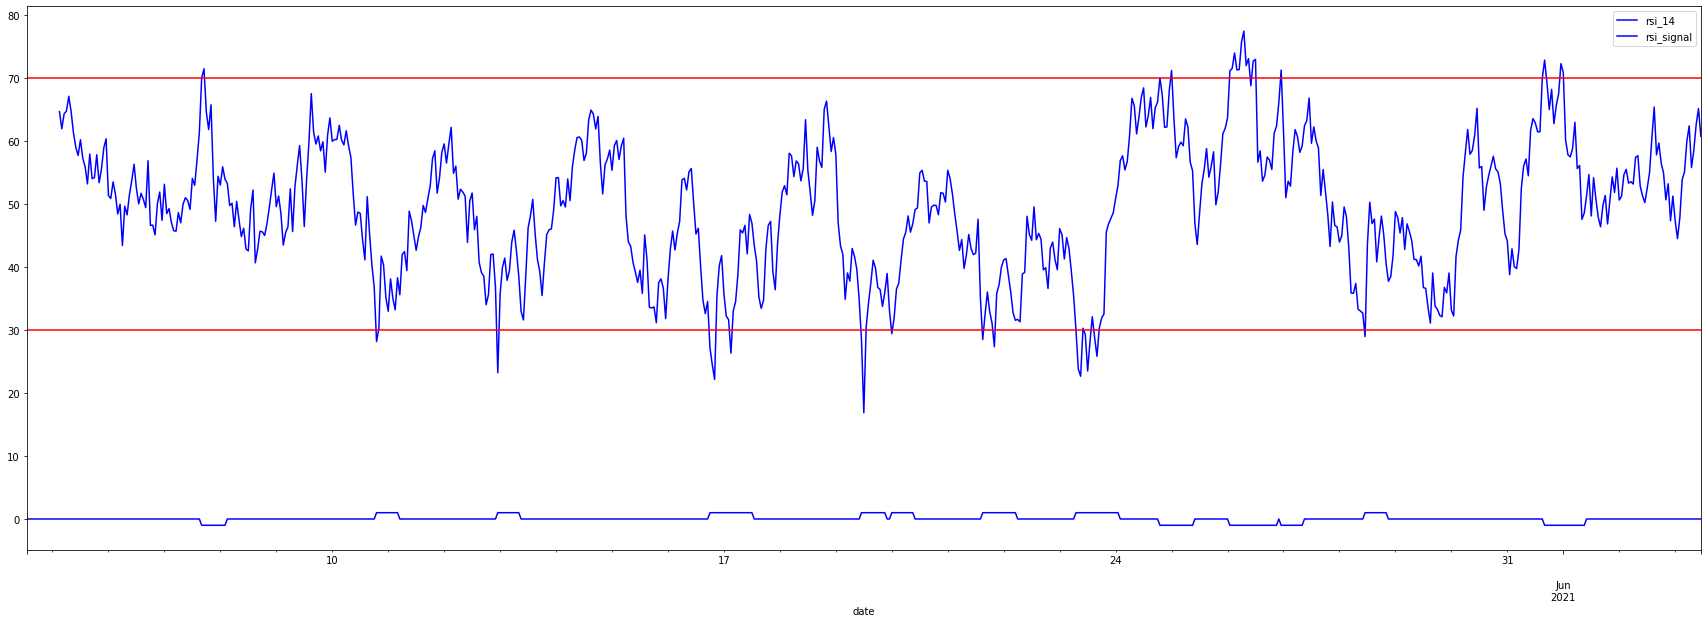

In [31]:
historical_prices_df[['rsi_14', 'rsi_signal']].plot(figsize=(30,10), color=['b', 'b'])
plt.axhline(y=70, color='r', linestyle='-')
plt.axhline(y=30, color='r', linestyle='-')

In [29]:
historical_prices_df.head()

,timestamp,open,high,low,close,volume,date,daily_return,EMA_9,EMA_20,...,avg_loss,rs,rsi_14,rsi_oversold,rsi_overbought,rsi_oversold_preceeding_5,rsi_overbought_preceeding_5,rsi_short,rsi_long,rsi_signal
date,,,,,,,,,,,,,,,,,,,,,
2021-05-04 13:00:00,1620133200000,43.33148,43.96450,42.80000,43.62079,3884.544996,2021-05-04 13:00:00,0.006677,43.620790,43.620790,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-04 14:00:00,1620136800000,43.86089,44.78445,42.50000,43.45113,13654.878700,2021-05-04 14:00:00,-0.003889,43.532695,43.534490,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-04 15:00:00,1620140400000,43.63000,44.16618,41.71651,42.81913,6420.149362,2021-05-04 15:00:00,-0.014545,43.276305,43.287727,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-04 16:00:00,1620144000000,42.52504,43.42227,41.51381,42.15578,6150.195445,2021-05-04 16:00:00,-0.015492,42.963031,42.989863,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-04 17:00:00,1620147600000,42.37602,45.35715,42.37602,45.35000,2689.873831,2021-05-04 17:00:00,0.075772,43.516635,43.495162,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 2. MACHINE LEARNING

## Set X-Variable List FOR EACH STRATEGY Filter to Obtain Associated Values

In [56]:
for col in historical_prices_df.columns:
    print(col)

timestamp
open
high
low
close
volume
date
daily_return
EMA_9
EMA_20
EMA_50
EMA_200
crossover_long_9v20
crossover_short_9v20
crossover_signal_9v20
crossover_long_50v200
crossover_short_50v200
crossover_signal_50v200
bollinger_mid_band
bollinger_std
bollinger_upper_band
bollinger_lower_band
bollinger_long
bollinger_short
bollinger_signal
mac_fast_12
mac_slow_26
macd
mac_signal_line_9ema
macd_diff
macd_long
macd_short
macd_signal
change
gain
loss
avg_gain
avg_loss
rs
rsi_14
rsi_overbought
rsi_oversold
rsi_overbought_preceeding_5
rsi_oversold_preceeding_5


### Define Strategies. 
 >  Strategy 1 = EMA50v200 + BB <br />
 > Strategy 2 = br />
 > Strategy 3 = EMA50v200 + EMA10v20 + MACD

In [67]:
# Set x variable list of features
st1_x_var_list = ['crossover_signal_50v200', 'bollinger_signal'] #'rsi_signal',
st2_x_var_list = ['crossover_signal_50v200', 'macd_signal'] #'rsi_signal',
# st3_x_var_list = ['crossover_signal_50v200', 'crossover_signal_9v20', 'macd_signal']


# Filter by x-variable list
strategy_1 = historical_prices_df[st1_x_var_list]

strategy_1['buy'] = np.where(historical_prices_df['crossover_signal_50v200'] + historical_prices_df['bollinger_signal'] == 2, 1.0, 0.0)
strategy_1.iloc[30:60]


,crossover_signal_50v200,bollinger_signal,buy
date,,,
2021-05-05 18:00:00,1.0,0.0,0.0
2021-05-05 19:00:00,1.0,0.0,0.0
2021-05-05 20:00:00,1.0,0.0,0.0
2021-05-05 21:00:00,1.0,0.0,0.0
2021-05-05 22:00:00,1.0,0.0,0.0
2021-05-05 23:00:00,1.0,-1.0,0.0
2021-05-06 00:00:00,1.0,0.0,0.0
2021-05-06 01:00:00,1.0,1.0,1.0
2021-05-06 02:00:00,1.0,0.0,0.0


In [58]:
historical_prices_df[st2_x_var_list].head(5)

,crossover_signal_50v200,macd_signal
date,,
2021-05-04 12:00:00,0.0,0.0
2021-05-04 13:00:00,1.0,1.0
2021-05-04 14:00:00,1.0,1.0
2021-05-04 15:00:00,-1.0,-1.0
2021-05-04 16:00:00,-1.0,-1.0


### Shift the DataFrame Index by 1

In [59]:
historical_prices_df[x_var_list] = historical_prices_df[x_var_list].shift(1)
historical_prices_df[x_var_list].tail()

NameError: name 'x_var_list' is not defined

### Drop NAs and Replace Infs (Positive/Negative Infinity) 

In [ ]:
# Drop NAs and replace positive/negative infinity values
historical_prices_df.dropna(subset=x_var_list, inplace=True)
historical_prices_df.dropna(subset=['daily_return'], inplace=True)
historical_prices_df = historical_prices_df.replace([np.inf, -np.inf], np.nan)
historical_prices_df.head()

### Construct the Dependent Variable

In [ ]:
historical_prices_df['Positive Return'] = np.where(historical_prices_df['daily_return'] > 0, 1.0, 0.0)
historical_prices_df.head()

### Assign Training and Testing Windows